In [170]:
from sklearn import datasets, metrics, svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np

# Question 1
Import	the	Iris Dataset from	SciKitLearn.
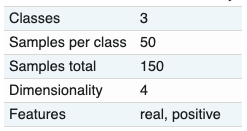
The iris data set has a total of: 
- 3 classes
- 50 samples per classes
- 150 total samples
- has a fimension of 4

In [171]:
iris = datasets.load_iris()

# Import iris data set into a dataframe 
# Also add a class column to when we split the data into later in qs 2
df = pd.DataFrame(np.c_[iris['data'], iris['target']],columns=iris['feature_names'] + ['class'])

df.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0


# Question 2
Split	 information	 from	 the	 dataset	 into Train, Test,
Validation	subset.

In [172]:
# We split the object column into three classes (50, 5) 
c1 = df[df['class'] == 0]
c2 = df[df['class'] == 1]
c3 = df[df['class'] == 2]

# Add 'class' to column features
col = iris.feature_names.append('class')

# create new empty data frames for Train, Test and Validation subset
train = pd.DataFrame(columns=col)
test = pd.DataFrame(columns=col)
validation = pd.DataFrame(columns=col)

X = iris.data
y = iris.target

In [173]:
# Subset of the data
irisSubsets = []

# Spliting iris data set into three (train, test and validation) with equal number or outcomes
for data in [c1, c2, c3]:
    X = data.drop(['class'], axis=1)
    y = data['class']
        
    # Since we have to split iris into 3, we have to split as follows (train, (test + validation)) and then split 
    # (test + validation)
    
    # Split one
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

    # Split two (test + validation)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
        
    # Add the splitted data into the correspoding classes and we ignore the index because it is not needed
    train = pd.concat([train, pd.concat([X_train, y_train], axis=1)], ignore_index=True)
    test = pd.concat([test, pd.concat([X_test, y_test], axis=1)], ignore_index=True) 
    validation = pd.concat([validation, pd.concat([X_val, y_val], axis=1)], ignore_index=True) 
    


# Question 3
Ensure	the	subsets	are	 Independent	and	Representative	
of	the	original	dataset.


In [174]:
# Getting the sunsets of iris
X_train = train.drop(['class'], axis=1).values
y_train = train['class'].values

X_test = test.drop(['class'], axis=1).values
y_test = test['class'].values

X_val = validation.drop(['class'], axis=1).values
y_val = validation['class'].values

# storing the subset in a list
irisSubsets = [X_train, y_train, X_test, y_test, X_val, y_val]

In [175]:
# test that sum of number of values in all three adds up to 150

# Train 50% of data
n1 = train.shape[0]

# Test 25% of data
n2 = test.shape[0]

# Validation 25% of data
n3 = validation.shape[0]

totalRows = n1 + n2 + n3
print('Total number of rows: ', totalRows)

Total number of rows:  150


# Question 4
Build	the	first	classifier	for	the	problem. 

In [176]:
# Funtion to get accuracy of the model
def get_accuracy(y_pred):
    chi = stats.chi2_contingency(pd.crosstab(index=y_val, columns=y_pred))
    effect = np.sqrt(chi[0]/(len(y_val)*2))

    return effect, metrics.accuracy_score(y_val, y_pred)

In [177]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# We will create an SVM Classifier
classifier1 = SVC(kernel='linear') # Linear Kernel

# clf.fit(X, y)  
classifier1.fit(irisSubsets[0], irisSubsets[1])

# Get prediction clf.predict
y_pred = classifier1.predict(irisSubsets[4]) 

clf_1 = get_accuracy(y_pred)
print("Chi-squared Effect:", clf_1[0])
print("Sklearn Accuracy:", clf_1[1])

ac1 = clf_1[1]

Chi-squared Effect: 0.9309493362512629
Sklearn Accuracy: 0.9487179487179487


# Question 5
Build	the	second	classifier	for	the	problem.

In [178]:
# Build the second clasifier using decision tree
classifier2 = DecisionTreeClassifier(random_state=0)  

# clf.fit(X, y)  
classifier2.fit(irisSubsets[0], irisSubsets[1])

# Get prediction clf.predict
y_pred = classifier2.predict(irisSubsets[4]) 

clf_2 = get_accuracy(y_pred)
print("Chi-squared Effect:", clf_2[0])
print("Sklearn Accuracy:", clf_2[1])

ac2 = clf_2[1]

Chi-squared Effect: 0.9013878188659973
Sklearn Accuracy: 0.9230769230769231


# Question 6
Build	the	third	and	final	classifier.

In [179]:
# Build the final clasifier using logistic regression
classifier3 = GaussianNB()

# clf.fit(X, y)  
classifier3.fit(irisSubsets[0], irisSubsets[1])

# Get prediction clf.predict
y_pred = classifier3.predict(irisSubsets[2]) 

ac3 = accuracy_score(irisSubsets[3], y_pred)
print("Sklearn Accuracy:", ac3 )

Sklearn Accuracy: 0.9722222222222222


# Question 7
Select	the	best	out	of	the	three	classifiers.

In [180]:
# To find out which is the best classifier we basically compary each accuracy and select the one closest to 1
print("Classifier 1: ", ac1)
print("Classifier 2: ", ac2)
print("Classifier 3: ", ac3)

# Based on the result below GaussianNB gives the best result for accuracy.
# GaussianNB is the best out of the three

Classifier 1:  0.9487179487179487
Classifier 2:  0.9230769230769231
Classifier 3:  0.9722222222222222


# Question 8
Report	 on	 the	 future	 performance	 of	 the	 selected	
classifier.

In [181]:
# Function to show the report for each classifier
def report(classifier): 
    prediction_valid = classifier.predict(irisSubsets[4])
    print(classification_report(irisSubsets[5], prediction_valid))

In [182]:
# Display all reports on all three classifier
print("Classifier 1: ")
report(classifier1)

print("Classifier 2: ")
report(classifier2)

print("Classifier 3: ")
report(classifier3)

Classifier 1: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.87      1.00      0.93        13
         2.0       1.00      0.85      0.92        13

    accuracy                           0.95        39
   macro avg       0.96      0.95      0.95        39
weighted avg       0.96      0.95      0.95        39

Classifier 2: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.81      1.00      0.90        13
         2.0       1.00      0.77      0.87        13

    accuracy                           0.92        39
   macro avg       0.94      0.92      0.92        39
weighted avg       0.94      0.92      0.92        39

Classifier 3: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.93      1.00      0.96        13
         2.0       1.00      0